-1.700033933110017e-08
1.242394817020001e-07
-7.738460525010008e-08
-2.477628336053e-06


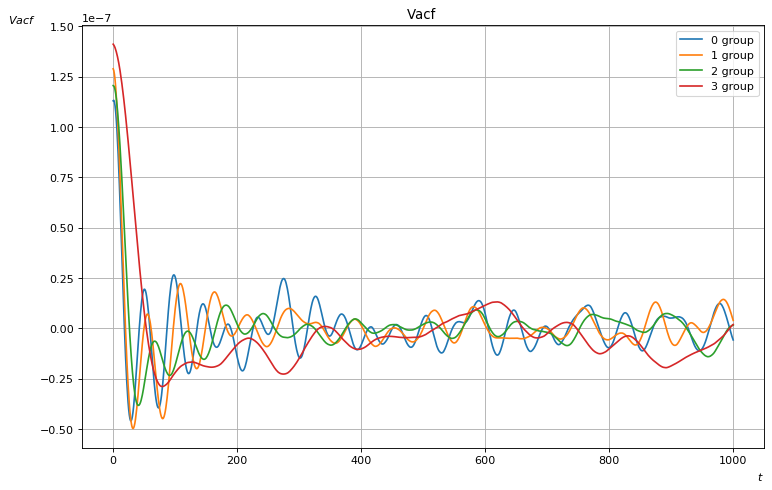

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("vacf.txt")

plt.figure(figsize=(11, 7), dpi=80)
plt.grid()
plt.title("Vacf ")
plt.ylabel(r"$Vacf$", rotation = 0, loc = 'top')
plt.xlabel(r"$t$", rotation = 0, loc = 'right')
for i in range(4):
    print(np.sum(data[:,i]))
    vacf0 = data[:,i][0] 
    #for j in range (len(data[:,i])):
        #data[:,i][j] /= vacf0
    plt.plot(data[:,i], "-", label = str(i) + " group")
plt.legend()

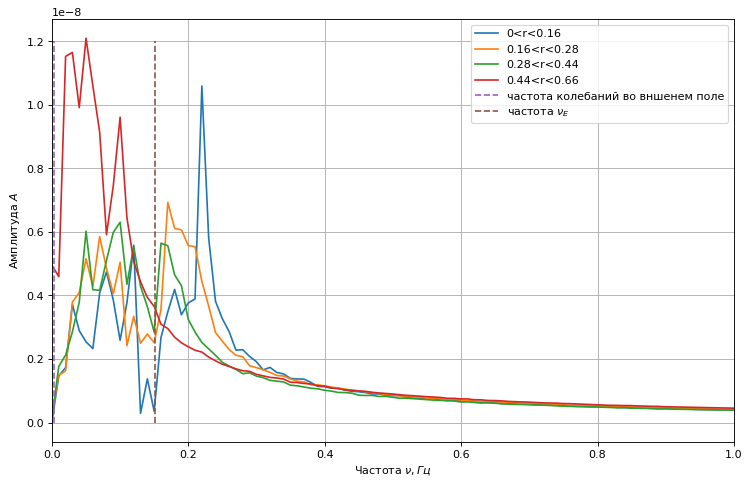

In [18]:
from scipy.fft import rfft, fftshift, rfftfreq, fft, fftfreq
T = 0.1
plt.figure(figsize=(11, 7), dpi=80)
N = len(data[:,0])
x = np.linspace(0.0, N * T, N, endpoint=False)
labels = ["0<r<0.16","0.16<r<0.28","0.28<r<0.44","0.44<r<0.66"]
plt.xlabel(r"Частота $\nu, Гц$")
plt.ylabel(r"Амплитуда $A$")
for i in range(4):
    yf = fft(data[:,i])
    xf = fftfreq(N, T)[:N//2]
    #xf = fftshift(xf)
    #yplot = fftshift(yf)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label = labels[i])
x_plot = [0.02 / 2.0 / np.pi] * 100
y_plot = np.linspace(0, 1.2e-8, 100)
plt.plot(x_plot, y_plot, "--", label = "частота колебаний во вншенем поле")

x_plot = [0.811 / 2.0 / np.pi * 7.0/6.0] * 100
y_plot = np.linspace(0, 1.2e-8, 100)
plt.plot(x_plot, y_plot, "--", label = r"частота $\nu_E$")

plt.xlim([0.0, 1.0])
plt.legend()
plt.grid()
plt.savefig("furier")
plt.show()